In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from epic_stats import Runner
from epic_lib.epic_utils import read_epic_image
import tqdm
import pandas as pd

In [3]:
runner = Runner()  # The main executor

# Demo: Compute a single frame

In [4]:
vid = 'P01_01'
frame_idx = 28802
lgrasp, rgrasp = runner.compute_frame_stat(vid, frame_idx)
print("Left hand grasp type: ", lgrasp)
print("Right hand grasp type: ", rgrasp)

Left hand grasp type:  None
Right hand grasp type:  Prismatic 2 Finger


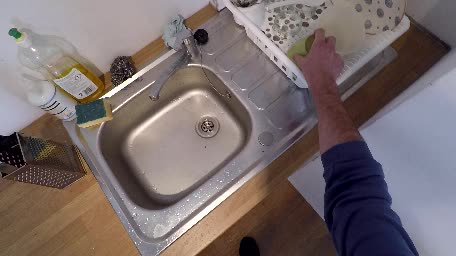

In [5]:
read_epic_image(vid, frame_idx, 
                root='/media/skynet/DATA/Zhifan/epic_rgb_frames/',
               as_pil=True)

# Batch compute

In [6]:
"""
gt_frames.json contains frame-of-interest.

It maps narration_id(nid) into (category, hand side, frame_list).

Those frames apprearing in frame_list have ground-truth mask labeled, 
so it's reasonable to assume in these frames the hands are in contact with objects.

Note there's also a `protable_object` field in the HOA dataframe indicating contact state.
"""

import json
with open('data/gt_frames.json') as fp:
    infos = json.load(fp)

In [8]:
result_list = []

for nid, dd in tqdm.tqdm(infos.items(), total=len(infos.keys())):
    vid = '_'.join(nid.split('_')[:2])
    for frame in dd['frames']:
        lg, rg = runner.compute_frame_stat(vid, frame)
        result_list.append((nid, frame, lg, rg))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 189/189 [01:50<00:00,  1.72it/s]


In [9]:
df = pd.DataFrame(data=result_list,
                 columns=['nid', 'frame', 'lgrasp', 'rgrasp'])

## Visualization

Left hand grasp type:  None
Right hand grasp type:  Ventral


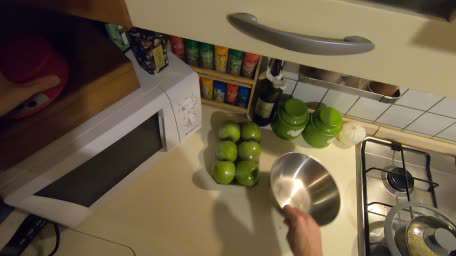

In [25]:
import numpy as np
idx = np.random.choice(len(df), 1).item()

nid, frame, lgrasp, rgrasp = df.iloc[idx]
print("Left hand grasp type: ", lgrasp)
print("Right hand grasp type: ", rgrasp)
read_epic_image('_'.join(nid.split('_')[:2]), frame, 
                root='/media/skynet/DATA/Zhifan/epic_rgb_frames/',
               as_pil=True)